# CIFAR-10 Dataset

The CIFAR-10 is a labeled subset of the 80-million tiny images dataset.

The CIFAR-10 dataset consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

The classification classes are:

0. Airplane 
1. Automobile
2. Bird
3. Cat
4. Deer
5. Dog
6. Frog
7. Horse
8. Ship
9. Truck

Details on the dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).



In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
print('Shape of the training set:', x_train.shape)
print('Shape of the test set:', x_test.shape)

Shape of the training set: (50000, 32, 32, 3)
Shape of the test set: (10000, 32, 32, 3)


In the training set, there are 50,000 images - each image being 32 by 32 pixels. In the test set, there are 10,000 images. The images are in RGB Format, indicated by the 3 channels.

Let's check the 4th image in the training set, for example:

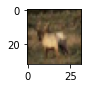

In [4]:
plt.figure(figsize = (10,1))
plt.imshow(x_train[3])
plt.show()

It looks like a Deer. Let's check the corresponding label:

In [5]:
print('The label of the 4th Image:', y_train[3])
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse',
           'Ship', 'Truck']
print("The 4th Image corresponds to a '{}'.".format(classes[y_train[3][0]]))

The label of the 4th Image: [4]
The 4th Image corresponds to a 'Deer'.


Thus, the image corresponds to a Deer.

We now scale the Input data:

In [6]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

Check the label classes  - the first 10 in this case, for example:

In [7]:
print(y_train[:10].reshape(10,))

[6 9 9 4 1 1 2 7 8 3]


We have to Encode the training and testing labels using One-Hot Encoding:

In [8]:
y_train_encoded = keras.utils.to_categorical(
    y_train, num_classes = 10, dtype = 'float32'
)

y_test_encoded = keras.utils.to_categorical(
    y_test, num_classes = 10, dtype = 'float32'
)

print('Encoded training labels: \n', y_train_encoded[:5])
print('Encoded test labels: \n', y_test_encoded[:5])

Encoded training labels: 
 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Encoded test labels: 
 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


## Keras - Model

```r
Number of Units = 32 * 32 * 3 = 3072
```

We try to incorporate this value into the first hidden layer.

If your training data is discrete, use Sparse Categorical Cross-entropy as the loss. If it is encoded, use Categorical Cross-entropy instead.

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer = 'SGD',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
              )

history = model.fit(x_train_scaled, y_train_encoded, epochs = 50, verbose = 2)

Epoch 1/50
1563/1563 - 10s - loss: 1.9765 - accuracy: 0.2923 - 10s/epoch - 7ms/step
Epoch 2/50
1563/1563 - 8s - loss: 1.8010 - accuracy: 0.3650 - 8s/epoch - 5ms/step
Epoch 3/50
1563/1563 - 6s - loss: 1.7243 - accuracy: 0.3925 - 6s/epoch - 4ms/step
Epoch 4/50
1563/1563 - 6s - loss: 1.6662 - accuracy: 0.4112 - 6s/epoch - 4ms/step
Epoch 5/50
1563/1563 - 6s - loss: 1.6173 - accuracy: 0.4288 - 6s/epoch - 4ms/step
Epoch 6/50
1563/1563 - 5s - loss: 1.5787 - accuracy: 0.4439 - 5s/epoch - 4ms/step
Epoch 7/50
1563/1563 - 6s - loss: 1.5417 - accuracy: 0.4541 - 6s/epoch - 4ms/step
Epoch 8/50
1563/1563 - 5s - loss: 1.5109 - accuracy: 0.4667 - 5s/epoch - 4ms/step
Epoch 9/50
1563/1563 - 6s - loss: 1.4828 - accuracy: 0.4765 - 6s/epoch - 4ms/step
Epoch 10/50
1563/1563 - 6s - loss: 1.4589 - accuracy: 0.4827 - 6s/epoch - 4ms/step
Epoch 11/50
1563/1563 - 6s - loss: 1.4355 - accuracy: 0.4932 - 6s/epoch - 4ms/step
Epoch 12/50
1563/1563 - 6s - loss: 1.4127 - accuracy: 0.5008 - 6s/epoch - 4ms/step
Epoch 13/50

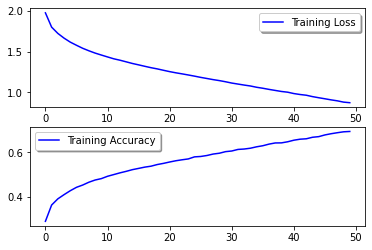

In [11]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [12]:
score = model.evaluate(x_test_scaled, y_test_encoded, verbose = 2)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

313/313 - 1s - loss: 1.3449 - accuracy: 0.5476 - 1s/epoch - 4ms/step
Test loss: 1.3449351787567139
Test accuracy: 0.5475999712944031


We see that the test accuracy is actually only around 55%. Making predictions with the test set would give us a "chance" prediction. 

Thus, this gives us an insight that no matter how high the training accuracy is, the test accuracy could still be a chance prediction. it also provides an insight that there may be "meaningful differences" between the data that the model trained on and the model is being tested with.

This further expands to show that when training a neural network, there are various knobs and dials that we can use to fine-tune the network.